# **Heart Disease Prediction** 
Let's Test Your skills in Classification Also  But this Time Let's Jump to Kaggle Platform !
https://www.kaggle.com/ronitf/heart-disease-uci/tasks

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold

df = pd.read_csv('heart.csv')
df[0:60]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Feature Descriptions
    *age: Age in years
    *ca: Number of major blood vessels (0-3)
    *chol: Serum cholestrol in mg/dl
    *cp: Chest pain type
        Value 1: Typical angina
        Value 2: Atypical angina
        Value 3: Non-anginal pain
        Value 4: Asymptomatic
    *exang: Exercise induced angina (1 = yes; 0 = no)
    *fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = no)
    *oldpeak: ST depression induced by exercise relative to rest
    *restecg: Resting electrocardiographic results
        Value 0: Normal
        Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
    *sex: Sex (1 = male; 0 = female)
    *slope: The slope of the peak exercise ST segment
        Value 1: Upsloping
        Value 2: Flat
        Value 3: Downsloping
    *target: Target (0 = disease; 1 = no disease)
    *thal: Thalium stress test
        Value 3: normal
        Value 6: fixed defect
        Value 7: reversibe defect
    *thalach: Maximum heart rate achieved in bpm
    *trestbps: Resting blood pressure (in mmHg on admission to the hospital)


In [371]:
df.describe()

,age,sex,trestbps,chol,thalach,oldpeak,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,0.466011,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,0.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,1.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 33.3+ KB


<AxesSubplot:>

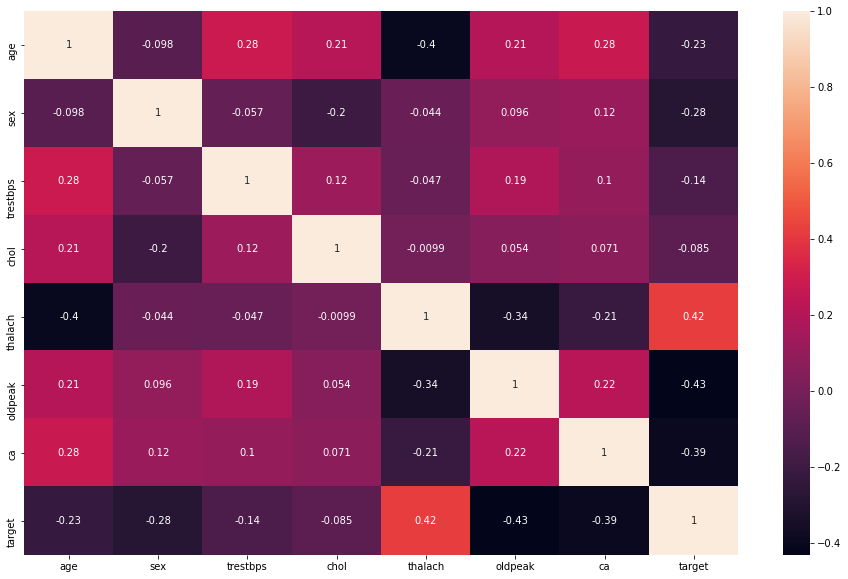

In [373]:
plt.figure(figsize = (16,10))

sns.heatmap(data=df.corr() ,annot=True)

# Obsirved

positive correlation between : Age vs trestbps , Age vs ca , Age vs chol , Age vs oldpeak , chol vs trestbps .

    *Graph show that as age increase , value of blood presure increase
    *Graph show that as age increase , value of oldpeak increase (ST depression)
    *Graph show that as age increase , value of ca increase
    *Graph show that as age increase , value of cholestrol  increase
    *Graph show that as cholestrol increase , value of blood presure increase.
    
Negative correlation between : age vs thalach , thalach vs oldpeak . 

    *Graph show that as age increase Maximum heart rate decrease
    *Graph show that as Maximum heart rate increase oldpeak decrease
    
 

In [374]:
x = df.drop('target',axis = 1)
y = df['target']

Injured    165
Hale       138
Name: target, dtype: int64


C:\Users\Mostafa Themar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

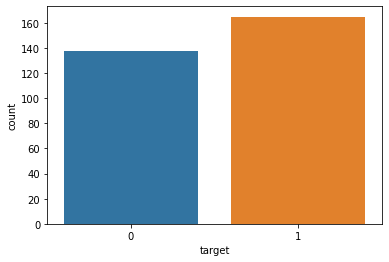

In [416]:
count = df.target.value_counts()
print(count)
sns.countplot(y)

In [376]:
print('Percentage of patience without heart problems :'+str(y.where(y==0).count()*100/303))
print('Precentage of patience with heart problems :'+str(y.where(y==1).count()*100/303))

Percentage of patience without heart problems :45.54455445544554
Precentage of patience with heart problems :54.45544554455446


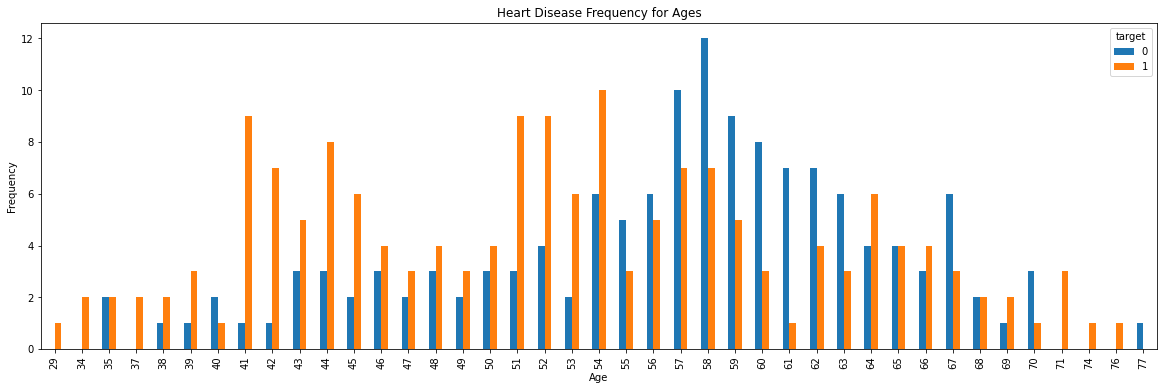

In [377]:
pd.crosstab(df['age'],df['target']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [386]:
df['sex'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='target'>

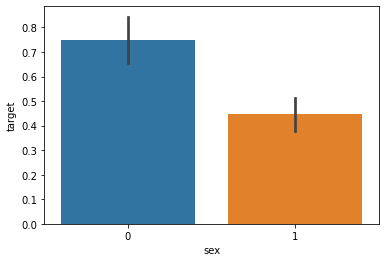

In [388]:

df['sex'] = df['sex']
sns.barplot(x=df['sex'],y=df['target'],data=df)

In [389]:
df['sex']=df['sex'].replace([1,0], ['Male', 'Female'])
df['target']=df['target'].replace([0,1], ['Hale', 'Injured'])
df['slope']=df['slope'].replace([0,1,2], ['Upsloping','Flat','Down-sloping'])
df['restecg']=df['restecg'].replace([0,1,2], ['Normal', 'Abnormality','Hypertrophy'])
df['exang']=df['exang'].replace([1,0], ['Yes', 'No'])
df['fbs']=df['fbs'].replace([1,0], ['Yes', 'No'])
df['thal']=df['thal'].replace([1,2,3], ['Normal', 'Fixed Defect','Reversible defect'])
df['cp']=df['cp'].replace([0,1,2,3], ['Typical angina', 'Atypical angina','Non-anginal pain','Asymptomatic pain'])

In [390]:

df['cp'].unique()

array(['Asymptomatic pain', 'Non-anginal pain', 'Atypical angina',
       'Typical angina'], dtype=object)

<AxesSubplot:xlabel='cp', ylabel='target'>

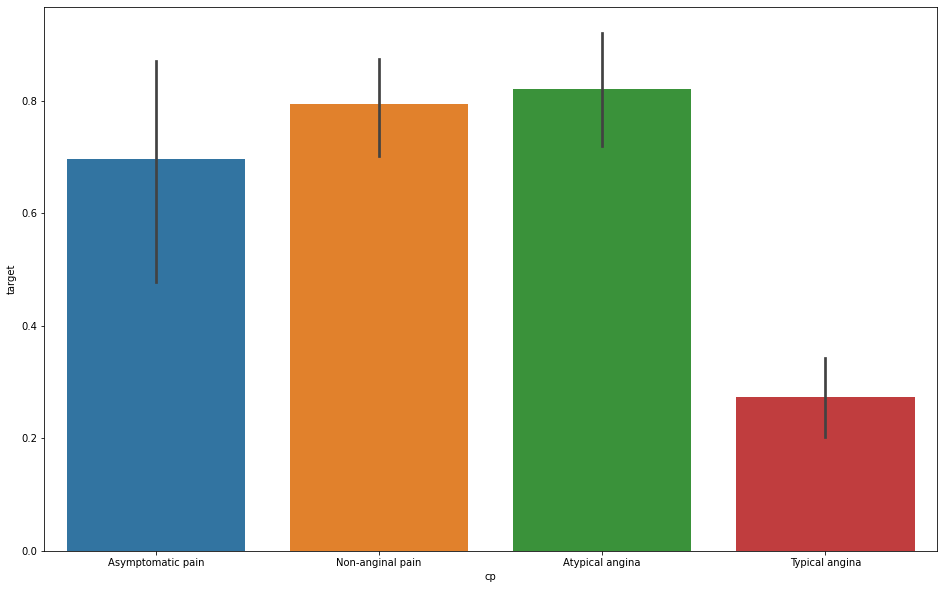

In [391]:

plt.figure(figsize=(16,10))
sns.barplot(x=df['cp'],y=y)

Text(0.5, 1.0, 'plot on Relation Between Maximum heart rate and chest pain types with respect to gender')

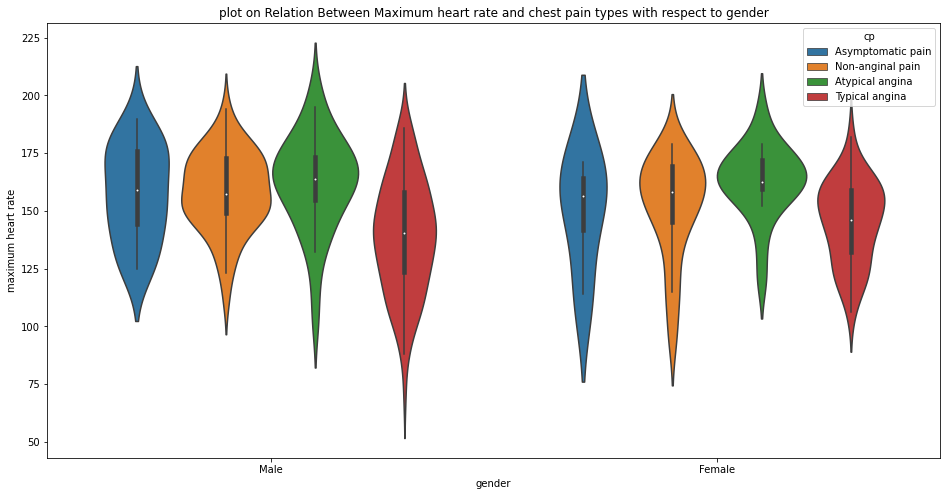

In [392]:
plt.figure(figsize= (16,8))
sns.violinplot(x="sex", y="thalach",hue="cp", data=df,
               cmap =["BuPy"]);
plt.xlabel('gender')
plt.ylabel('maximum heart rate')
plt.title("plot on Relation Between Maximum heart rate and chest pain types with respect to gender")

In [393]:
df['restecg'].unique()

array(['Normal', 'Abnormality', 'Hypertrophy'], dtype=object)

<AxesSubplot:xlabel='restecg', ylabel='target'>

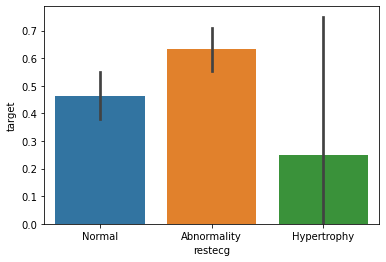

In [405]:
sns.barplot(x=df['restecg'],y=y)

Text(0.5, 1.0, 'plot on Relation Between Maximum heart rate and chest pain types with respect to gender')

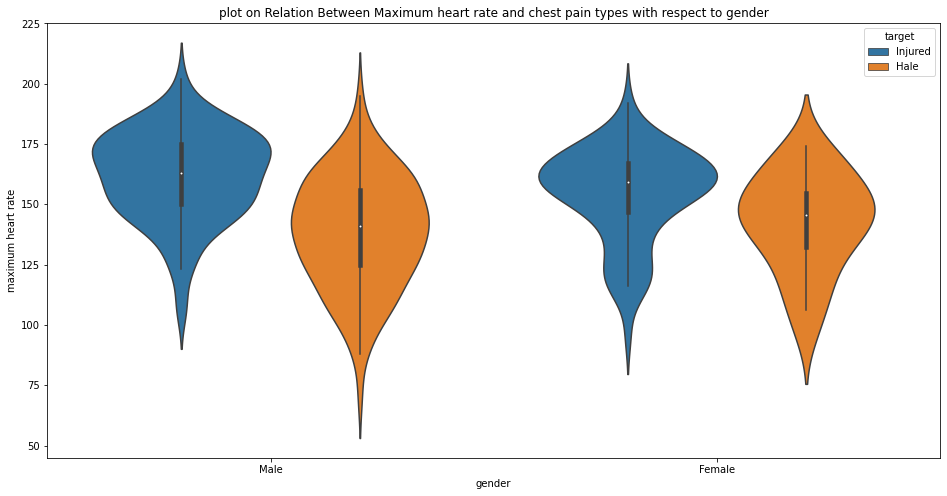

In [406]:

plt.figure(figsize= (16,8))
sns.violinplot(x="sex", y="thalach",hue="target", data=df,
               cmap =["BuPy"])
plt.xlabel('gender')
plt.ylabel('maximum heart rate')
plt.title("plot on Relation Between Maximum heart rate and chest pain types with respect to gender")

In [407]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [408]:
df['thalach'].median()

153.0

In [409]:
df['slope'].unique()

array(['Upsloping', 'Down-sloping', 'Flat'], dtype=object)

<AxesSubplot:xlabel='slope', ylabel='target'>

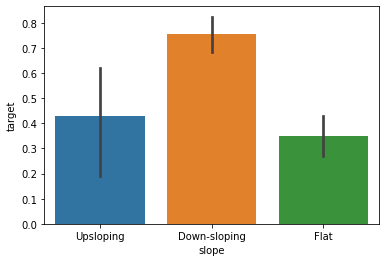

In [410]:
sns.barplot(x=df['slope'],y=y)

Text(0.5, 1.0, 'plot on Relation Between Maximum heart rate and slope types with respect to gender')

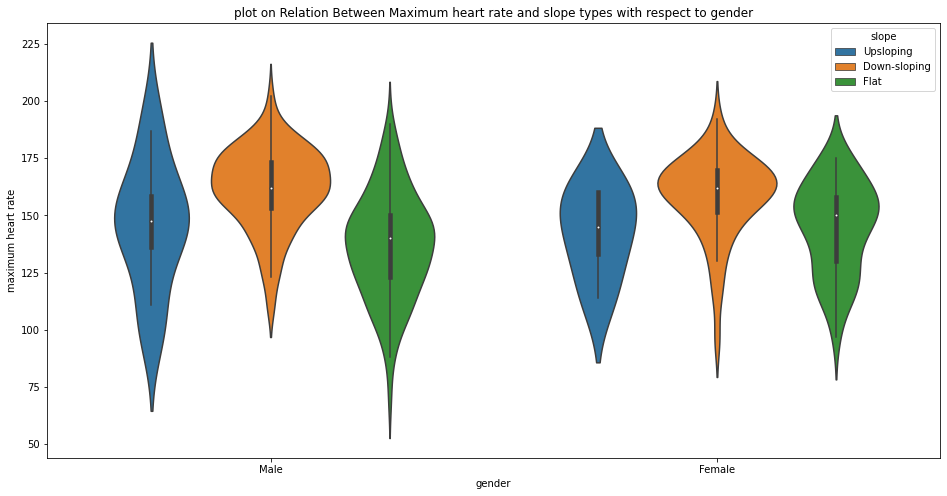

In [411]:
plt.figure(figsize= (16,8))
sns.violinplot(x="sex", y="thalach",hue="slope", data=df,
               cmap =["BuPy"]);
plt.xlabel('gender')
plt.ylabel('maximum heart rate')
plt.title("plot on Relation Between Maximum heart rate and slope types with respect to gender")

In [412]:
df['chol'].median()

240.0

<AxesSubplot:ylabel='Frequency'>

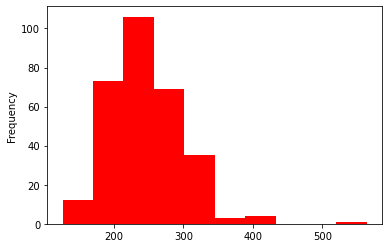

In [413]:
df['chol'].plot.hist(bins = 10, color = 'red')

In [414]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [415]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler().fit(X=x_train)
scl.scale_

array([ 9.17239753,  0.47358115,  1.03467602, 16.98040355, 54.47794485,
        0.33337412,  0.52583233, 22.69823231,  0.46676667,  1.0890916 ,
        0.61226342,  0.94857071,  0.59297162])

In [132]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.3, random_state = 42)

In [133]:
x_test.shape

(91, 13)

In [103]:
x_train.shape

(212, 13)

In [105]:
# This function plots the confusion matrices given y_i, y_i_hat.
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Accuarcy in test : 0.8131868131868132
Accuarcy in train : 0.8726415094339622
Precision in test : 0.8235294117647058
Precision in train : 0.8548387096774194
Recall  inu test: 0.84
Recall  in train: 0.9217391304347826
log loss 6.45237796802586
Accuracy: 82.48918% (7.16215%)


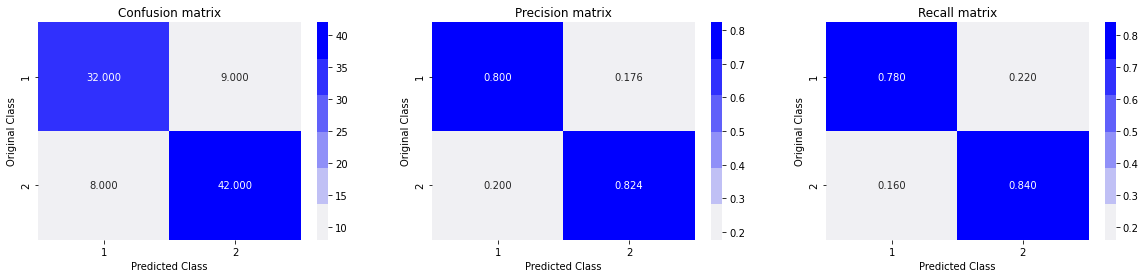

Time taken to eun this cell :  0:00:02.484182


In [34]:
from datetime import datetime
start = datetime.now()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , precision_score,recall_score,f1_score
from sklearn import metrics
classifier = LogisticRegression(max_iter=1000,)
classifier.fit(x_train,y_train)
prediction = classifier.predict(x_test)

print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))
print('Accuarcy in train :' ,metrics.accuracy_score(y_train,classifier.predict(x_train)))

print('Precision in test :', precision_score(y_test, prediction))
print('Precision in train :', precision_score(y_train, classifier.predict(x_train)))

print('Recall  inu test:', recall_score(y_test,prediction))
print('Recall  in train:', recall_score(y_train,classifier.predict(x_train)))

print('log loss' , metrics.log_loss(y_test, prediction))

accuracy_score(y_train,classifier.predict(x_train))
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10,scoring="accuracy")
print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))
plot_confusion_matrix(y_test,prediction)
print('Time taken to eun this cell : ', datetime.now() - start)

In [35]:
classifier.coef_

array([[ 0.00580361, -1.12466002,  0.80197838, -0.00768781, -0.00197571,
         0.34654356,  0.6126885 ,  0.01772643, -1.0346261 , -0.51116554,
         0.79072614, -1.04556231, -1.17162879]])

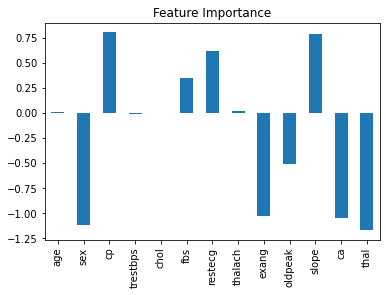

In [36]:
features = dict(zip(df.columns.values, list(classifier.coef_[0])))

feature = pd.DataFrame(features, index=[0])
feature.T.plot.bar(title="Feature Importance", legend=False);

In [11]:
from sklearn import svm 
#params = {"kernel" : "linear","poly","rbf","sigmoid"}

classifier = svm.SVC(kernel='poly',degree=4)
classifier.fit(x_train,y_train)
prediction = classifier.predict(x_test)

print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))
print('Accuarcy in train :' ,metrics.accuracy_score(y_train,classifier.predict(x_train)))

print('Precision in test :', precision_score(y_test, prediction))
print('Precision in train :', precision_score(y_train, classifier.predict(x_train)))

print('Recall  in test:', recall_score(y_test,prediction))
print('Recall  in test:', recall_score(y_train,classifier.predict(x_train)))

print('hinge loss' , metrics.hinge_loss(y_test, prediction))
plot_confusion_matrix(y_test,prediction)

NameError: name 'x_train' is not defined

C:\Users\Mostafa Themar\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuarcy in test : 0.8021978021978022
Accuarcy in train : 0.8773584905660378
Precision in test : 0.82
Precision in train : 0.856
Recall  in test: 0.82
Recall  in test: 0.9304347826086956
hinge loss 0.6483516483516484


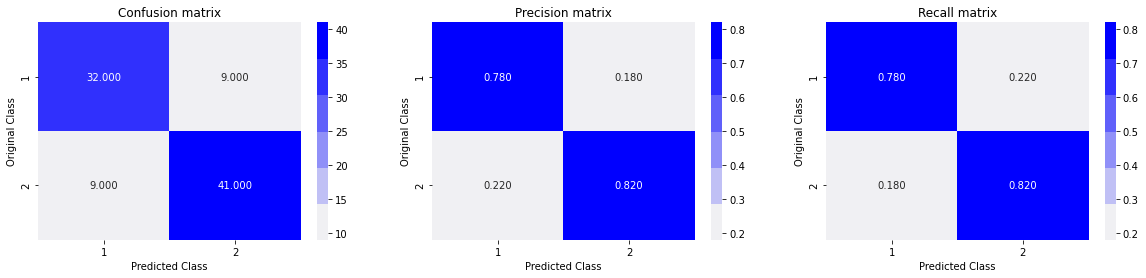

In [55]:
from sklearn.svm import LinearSVC

classifier = LinearSVC(max_iter=10000000, loss="hinge", C=1)
classifier.fit(x_train,y_train)
prediction = classifier.predict(x_test)

print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))
print('Accuarcy in train :' ,metrics.accuracy_score(y_train,classifier.predict(x_train)))

print('Precision in test :', precision_score(y_test, prediction))
print('Precision in train :', precision_score(y_train, classifier.predict(x_train)))

print('Recall  in test:', recall_score(y_test,prediction))
print('Recall  in test:', recall_score(y_train,classifier.predict(x_train)))

print('hinge loss' , metrics.hinge_loss(y_test, prediction))

plot_confusion_matrix(y_test,prediction)




In [66]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,30):
    
    classifier = KNeighborsClassifier(n_neighbors=i,)
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    #best 

print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))
print('Accuarcy in train :' ,metrics.accuracy_score(y_train,classifier.predict(x_train)))

print('Precision in test :', precision_score(y_test, prediction))
print('Precision in train :', precision_score(y_train, classifier.predict(x_train)))

print('Recall  in test:', recall_score(y_test,prediction))
print('Recall  in train:', recall_score(y_train,classifier.predict(x_train)))

print('log loss' , metrics.log_loss(y_test, prediction))


Accuarcy in test : 0.6703296703296703
Accuarcy in train : 0.660377358490566
Precision in test : 0.6851851851851852
Precision in train : 0.6692913385826772
Recall  in test: 0.74
Recall  in train: 0.7391304347826086
log loss 11.386559175864107


In [243]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
for x in range(300):
    classifier = DecisionTreeClassifier(random_state=x)#MAX DEPTH
    classifier.fit(x_train,y_train)
    cur_acc = metrics.accuracy_score(y_test,classifier.predict(x_test))
    if (cur_acc > max_accuracy):
        max_accuracy = cur_acc
        best_x = x
        
print(best_x)
print(max_accuracy)

classifier = DecisionTreeClassifier(random_state=best_x)
classifier.fit(x_train,y_train)
prediction = classifier.predict(x_test)
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))
print('Accuarcy in train :' ,metrics.accuracy_score(y_train,classifier.predict(x_train)))

print('Precision in test :', precision_score(y_test, prediction))
print('Precision in train :', precision_score(y_train, classifier.predict(x_train)))

print('Recall  in test:', recall_score(y_test,prediction))
print('Recall  in train:', recall_score(y_train,classifier.predict(x_train)))



34
0.8131868131868132
Accuarcy in test : 0.8131868131868132
Accuarcy in train : 1.0
Precision in test : 0.8604651162790697
Precision in train : 1.0
Recall  in test: 0.7708333333333334
Recall  in train: 1.0


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

Accuarcy in test :  0.8681318681318682
Accuracy in train:  0.9575471698113207
Precision in test : 0.8653846153846154
Precision in train : 0.9568965517241379
Recall  in test: 0.9
Recall  in train : 0.9652173913043478


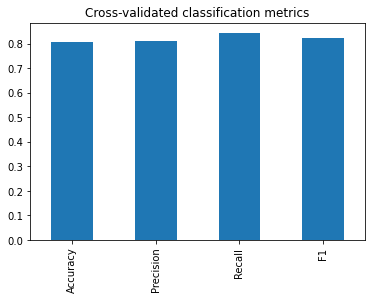

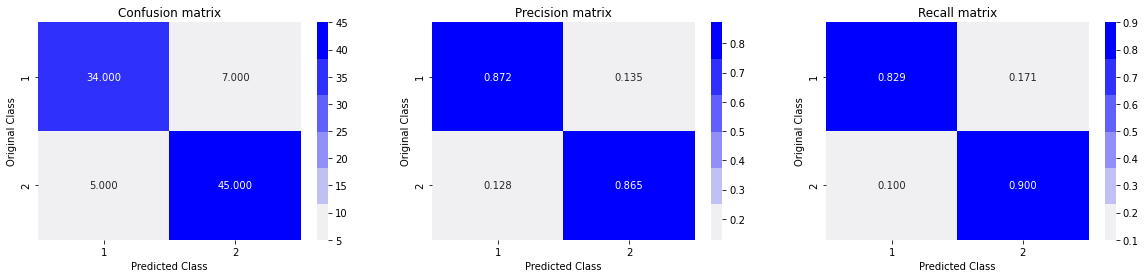

Time taken to run this cell:  0:01:18.989156


In [112]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection
start = datetime.now()
max_accuracy = 0

for x in range(300):
    classifier = ExtraTreesClassifier(random_state=x)
    classifier.fit(x_train,y_train)
    cur_acc = metrics.accuracy_score(y_test,classifier.predict(x_test))
    if (cur_acc > max_accuracy):
        max_accuracy = cur_acc
        best_x = x

classifier = ExtraTreesClassifier(random_state=best_x)
params = {
    "n_estimators" : np.arange(100,500,100),
    "max_depth"    :np.arange(1,15,1),
    "criterion"    : ["gini","entropy"]
}
model = model_selection.GridSearchCV(

    estimator= classifier,
    param_grid=params,
    cv = 10,
    verbose = 10,
    n_jobs=-1,
    scoring="accuracy"
)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print('Accuarcy in test : ',metrics.accuracy_score(y_test,prediction,model))
print('Accuracy in train: ',metrics.accuracy_score(y_train,model.predict(x_train),model))
print('Precision in test :', precision_score(y_test, prediction))
print('Precision in train :', precision_score(y_train, model.predict(x_train)))
print('Recall  in test:', recall_score(y_test,prediction))
print('Recall  in train :', recall_score(y_train, model.predict(x_train)))

cv_acc = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_precision = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_recall = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_f1 = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "f1")
cv_f1 = np.mean(cv_f1)

cv_metrics = pd.DataFrame({'Accuracy': cv_acc,'Precision': cv_precision,'Recall': cv_recall,'F1': cv_f1},index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)
plot_confusion_matrix(y_test,prediction)
print('Time taken to run this cell: ', datetime.now() - start)


Fitting 10 folds for each of 342 candidates, totalling 3420 fits
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.818, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.773, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.619, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.857, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.762, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.762, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.905, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.905, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.810, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.714, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.818, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.773, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.524, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.857, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.762, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.714, total=   0.2s
[CV] criterion

[CV]  criterion=gini, max_depth=1, n_estimators=700, score=0.762, total=   0.5s
[CV] criterion=gini, max_depth=1, n_estimators=700 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=700, score=0.762, total=   0.6s
[CV] criterion=gini, max_depth=1, n_estimators=700 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=700, score=0.952, total=   0.6s
[CV] criterion=gini, max_depth=1, n_estimators=700 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=700, score=0.810, total=   0.6s
[CV] criterion=gini, max_depth=1, n_estimators=700 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=700, score=0.810, total=   0.5s
[CV] criterion=gini, max_depth=1, n_estimators=700 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=700, score=0.762, total=   0.6s
[CV] criterion=gini, max_depth=1, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=800, score=0.818, total=   0.5s
[CV] criterion

[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.810, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.773, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.773, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.571, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.857, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.762, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.714, total=   0.3s
[CV] criterion

[CV]  criterion=gini, max_depth=2, n_estimators=900, score=0.762, total=   0.7s
[CV] criterion=gini, max_depth=2, n_estimators=900 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=900, score=0.714, total=   0.7s
[CV] criterion=gini, max_depth=2, n_estimators=900 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=900, score=0.952, total=   0.7s
[CV] criterion=gini, max_depth=2, n_estimators=900 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=900, score=0.857, total=   0.7s
[CV] criterion=gini, max_depth=2, n_estimators=900 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=900, score=0.857, total=   0.7s
[CV] criterion=gini, max_depth=2, n_estimators=900 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=900, score=0.810, total=   0.7s
[CV] criterion=gini, max_depth=3, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=3, n_estimators=100, score=0.773, total=   0.1s
[CV] criterion

[CV]  criterion=gini, max_depth=3, n_estimators=500, score=0.810, total=   0.5s
[CV] criterion=gini, max_depth=3, n_estimators=600 ...................
[CV]  criterion=gini, max_depth=3, n_estimators=600, score=0.727, total=   0.4s
[CV] criterion=gini, max_depth=3, n_estimators=600 ...................
[CV]  criterion=gini, max_depth=3, n_estimators=600, score=0.773, total=   0.4s
[CV] criterion=gini, max_depth=3, n_estimators=600 ...................
[CV]  criterion=gini, max_depth=3, n_estimators=600, score=0.571, total=   0.4s
[CV] criterion=gini, max_depth=3, n_estimators=600 ...................
[CV]  criterion=gini, max_depth=3, n_estimators=600, score=0.857, total=   0.4s
[CV] criterion=gini, max_depth=3, n_estimators=600 ...................
[CV]  criterion=gini, max_depth=3, n_estimators=600, score=0.714, total=   0.4s
[CV] criterion=gini, max_depth=3, n_estimators=600 ...................
[CV]  criterion=gini, max_depth=3, n_estimators=600, score=0.762, total=   0.5s
[CV] criterion

[CV]  criterion=gini, max_depth=4, n_estimators=200, score=0.762, total=   0.2s
[CV] criterion=gini, max_depth=4, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=200, score=0.714, total=   0.2s
[CV] criterion=gini, max_depth=4, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=200, score=0.905, total=   0.2s
[CV] criterion=gini, max_depth=4, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=200, score=0.857, total=   0.2s
[CV] criterion=gini, max_depth=4, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=200, score=0.857, total=   0.2s
[CV] criterion=gini, max_depth=4, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=200, score=0.810, total=   0.2s
[CV] criterion=gini, max_depth=4, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=300, score=0.727, total=   0.2s
[CV] criterion

[CV]  criterion=gini, max_depth=4, n_estimators=700, score=0.810, total=   0.6s
[CV] criterion=gini, max_depth=4, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=800, score=0.727, total=   0.6s
[CV] criterion=gini, max_depth=4, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=800, score=0.773, total=   0.6s
[CV] criterion=gini, max_depth=4, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=800, score=0.667, total=   0.6s
[CV] criterion=gini, max_depth=4, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=800, score=0.952, total=   0.6s
[CV] criterion=gini, max_depth=4, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=800, score=0.762, total=   0.6s
[CV] criterion=gini, max_depth=4, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=800, score=0.619, total=   0.6s
[CV] criterion

[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.762, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.667, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.905, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.905, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.810, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.762, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.636, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=5, n_estimators=900, score=0.810, total=   0.7s
[CV] criterion=gini, max_depth=6, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=100, score=0.727, total=   0.1s
[CV] criterion=gini, max_depth=6, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=100, score=0.727, total=   0.1s
[CV] criterion=gini, max_depth=6, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=100, score=0.667, total=   0.1s
[CV] criterion=gini, max_depth=6, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=100, score=0.762, total=   0.1s
[CV] criterion=gini, max_depth=6, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=100, score=0.810, total=   0.1s
[CV] criterion=gini, max_depth=6, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=100, score=0.619, total=   0.1s
[CV] criterion

[CV]  criterion=gini, max_depth=6, n_estimators=600, score=0.810, total=   0.4s
[CV] criterion=gini, max_depth=6, n_estimators=600 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=600, score=0.667, total=   0.4s
[CV] criterion=gini, max_depth=6, n_estimators=600 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=600, score=0.905, total=   0.4s
[CV] criterion=gini, max_depth=6, n_estimators=600 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=600, score=0.905, total=   0.4s
[CV] criterion=gini, max_depth=6, n_estimators=600 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=600, score=0.810, total=   0.5s
[CV] criterion=gini, max_depth=6, n_estimators=600 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=600, score=0.810, total=   0.4s
[CV] criterion=gini, max_depth=6, n_estimators=700 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=700, score=0.636, total=   0.6s
[CV] criterion

[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.762, total=   0.2s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.682, total=   0.3s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.773, total=   0.3s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.714, total=   0.3s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.905, total=   0.3s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.810, total=   0.3s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.667, total=   0.3s
[CV] criterion

[CV]  criterion=gini, max_depth=7, n_estimators=800, score=0.762, total=   0.5s
[CV] criterion=gini, max_depth=7, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=7, n_estimators=800, score=0.619, total=   0.5s
[CV] criterion=gini, max_depth=7, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=7, n_estimators=800, score=0.905, total=   0.5s
[CV] criterion=gini, max_depth=7, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=7, n_estimators=800, score=0.857, total=   0.5s
[CV] criterion=gini, max_depth=7, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=7, n_estimators=800, score=0.810, total=   0.6s
[CV] criterion=gini, max_depth=7, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=7, n_estimators=800, score=0.810, total=   0.6s
[CV] criterion=gini, max_depth=7, n_estimators=900 ...................
[CV]  criterion=gini, max_depth=7, n_estimators=900, score=0.636, total=   0.7s
[CV] criterion

[CV]  criterion=gini, max_depth=8, n_estimators=400, score=0.762, total=   0.3s
[CV] criterion=gini, max_depth=8, n_estimators=500 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=500, score=0.636, total=   0.4s
[CV] criterion=gini, max_depth=8, n_estimators=500 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=500, score=0.818, total=   0.4s
[CV] criterion=gini, max_depth=8, n_estimators=500 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=500, score=0.667, total=   0.4s
[CV] criterion=gini, max_depth=8, n_estimators=500 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=500, score=0.857, total=   0.4s
[CV] criterion=gini, max_depth=8, n_estimators=500 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=500, score=0.810, total=   0.4s
[CV] criterion=gini, max_depth=8, n_estimators=500 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=500, score=0.667, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=9, n_estimators=100, score=0.667, total=   0.1s
[CV] criterion=gini, max_depth=9, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=9, n_estimators=100, score=0.857, total=   0.1s
[CV] criterion=gini, max_depth=9, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=9, n_estimators=100, score=0.857, total=   0.1s
[CV] criterion=gini, max_depth=9, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=9, n_estimators=100, score=0.810, total=   0.1s
[CV] criterion=gini, max_depth=9, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=9, n_estimators=100, score=0.810, total=   0.1s
[CV] criterion=gini, max_depth=9, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=9, n_estimators=200, score=0.636, total=   0.2s
[CV] criterion=gini, max_depth=9, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=9, n_estimators=200, score=0.773, total=   0.2s
[CV] criterion

[CV]  criterion=gini, max_depth=9, n_estimators=700, score=0.636, total=   0.6s
[CV] criterion=gini, max_depth=9, n_estimators=700 ...................
[CV]  criterion=gini, max_depth=9, n_estimators=700, score=0.818, total=   0.6s
[CV] criterion=gini, max_depth=9, n_estimators=700 ...................
[CV]  criterion=gini, max_depth=9, n_estimators=700, score=0.714, total=   0.5s
[CV] criterion=gini, max_depth=9, n_estimators=700 ...................
[CV]  criterion=gini, max_depth=9, n_estimators=700, score=0.762, total=   0.6s
[CV] criterion=gini, max_depth=9, n_estimators=700 ...................
[CV]  criterion=gini, max_depth=9, n_estimators=700, score=0.810, total=   0.5s
[CV] criterion=gini, max_depth=9, n_estimators=700 ...................
[CV]  criterion=gini, max_depth=9, n_estimators=700, score=0.619, total=   0.6s
[CV] criterion=gini, max_depth=9, n_estimators=700 ...................
[CV]  criterion=gini, max_depth=9, n_estimators=700, score=0.905, total=   0.5s
[CV] criterion

[CV]  criterion=gini, max_depth=10, n_estimators=300, score=0.619, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=300, score=0.905, total=   0.2s
[CV] criterion=gini, max_depth=10, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=300, score=0.857, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=300, score=0.810, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=300, score=0.810, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=400, score=0.636, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=400, score=0.818, total=   0.3s
[CV] cr

[CV]  criterion=gini, max_depth=10, n_estimators=800, score=0.810, total=   0.5s
[CV] criterion=gini, max_depth=10, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=900, score=0.636, total=   0.7s
[CV] criterion=gini, max_depth=10, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=900, score=0.773, total=   0.7s
[CV] criterion=gini, max_depth=10, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=900, score=0.667, total=   0.7s
[CV] criterion=gini, max_depth=10, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=900, score=0.857, total=   0.7s
[CV] criterion=gini, max_depth=10, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=900, score=0.762, total=   0.7s
[CV] criterion=gini, max_depth=10, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=900, score=0.667, total=   0.7s
[CV] cr

[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.857, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.810, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.667, total=   0.5s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.905, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.857, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.810, total=   0.5s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.762, total=   0.4s
[CV] cr

[CV]  criterion=gini, max_depth=12, n_estimators=100, score=0.810, total=   0.1s
[CV] criterion=gini, max_depth=12, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=12, n_estimators=100, score=0.762, total=   0.1s
[CV] criterion=gini, max_depth=12, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=12, n_estimators=100, score=0.810, total=   0.1s
[CV] criterion=gini, max_depth=12, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=12, n_estimators=200, score=0.636, total=   0.2s
[CV] criterion=gini, max_depth=12, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=12, n_estimators=200, score=0.682, total=   0.2s
[CV] criterion=gini, max_depth=12, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=12, n_estimators=200, score=0.667, total=   0.2s
[CV] criterion=gini, max_depth=12, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=12, n_estimators=200, score=0.857, total=   0.2s
[CV] cr

[CV]  criterion=gini, max_depth=12, n_estimators=700, score=0.818, total=   0.6s
[CV] criterion=gini, max_depth=12, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=12, n_estimators=700, score=0.619, total=   0.5s
[CV] criterion=gini, max_depth=12, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=12, n_estimators=700, score=0.810, total=   0.5s
[CV] criterion=gini, max_depth=12, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=12, n_estimators=700, score=0.810, total=   0.6s
[CV] criterion=gini, max_depth=12, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=12, n_estimators=700, score=0.714, total=   0.6s
[CV] criterion=gini, max_depth=12, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=12, n_estimators=700, score=0.905, total=   0.5s
[CV] criterion=gini, max_depth=12, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=12, n_estimators=700, score=0.857, total=   0.8s
[CV] cr

[CV]  criterion=gini, max_depth=13, n_estimators=300, score=0.714, total=   0.2s
[CV] criterion=gini, max_depth=13, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=13, n_estimators=300, score=0.857, total=   0.2s
[CV] criterion=gini, max_depth=13, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=13, n_estimators=300, score=0.857, total=   0.3s
[CV] criterion=gini, max_depth=13, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=13, n_estimators=300, score=0.810, total=   0.3s
[CV] criterion=gini, max_depth=13, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=13, n_estimators=300, score=0.857, total=   0.3s
[CV] criterion=gini, max_depth=13, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=13, n_estimators=400, score=0.636, total=   0.3s
[CV] criterion=gini, max_depth=13, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=13, n_estimators=400, score=0.773, total=   0.3s
[CV] cr

[CV]  criterion=gini, max_depth=13, n_estimators=800, score=0.810, total=   0.5s
[CV] criterion=gini, max_depth=13, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=13, n_estimators=900, score=0.636, total=   0.7s
[CV] criterion=gini, max_depth=13, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=13, n_estimators=900, score=0.818, total=   0.7s
[CV] criterion=gini, max_depth=13, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=13, n_estimators=900, score=0.667, total=   0.7s
[CV] criterion=gini, max_depth=13, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=13, n_estimators=900, score=0.905, total=   0.7s
[CV] criterion=gini, max_depth=13, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=13, n_estimators=900, score=0.810, total=   0.8s
[CV] criterion=gini, max_depth=13, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=13, n_estimators=900, score=0.667, total=   0.7s
[CV] cr

[CV]  criterion=gini, max_depth=14, n_estimators=500, score=0.905, total=   1.1s
[CV] criterion=gini, max_depth=14, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=14, n_estimators=500, score=0.810, total=   1.1s
[CV] criterion=gini, max_depth=14, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=14, n_estimators=500, score=0.667, total=   1.1s
[CV] criterion=gini, max_depth=14, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=14, n_estimators=500, score=0.857, total=   1.1s
[CV] criterion=gini, max_depth=14, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=14, n_estimators=500, score=0.857, total=   1.0s
[CV] criterion=gini, max_depth=14, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=14, n_estimators=500, score=0.810, total=   0.5s
[CV] criterion=gini, max_depth=14, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=14, n_estimators=500, score=0.810, total=   0.4s
[CV] cr

[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.762, total=   0.3s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.905, total=   0.3s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.857, total=   0.3s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.636, total=   0.5s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.818, total=   0.5s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.667, total=   0.5s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.810, total=   0.5s
[CV] cr

[CV]  criterion=gini, max_depth=15, n_estimators=700, score=0.773, total=   0.6s
[CV] criterion=gini, max_depth=15, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=700, score=0.667, total=   0.5s
[CV] criterion=gini, max_depth=15, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=700, score=0.905, total=   0.5s
[CV] criterion=gini, max_depth=15, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=700, score=0.810, total=   0.5s
[CV] criterion=gini, max_depth=15, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=700, score=0.619, total=   0.6s
[CV] criterion=gini, max_depth=15, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=700, score=0.905, total=   0.6s
[CV] criterion=gini, max_depth=15, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=700, score=0.857, total=   0.6s
[CV] cr

[CV]  criterion=gini, max_depth=16, n_estimators=300, score=0.667, total=   0.3s
[CV] criterion=gini, max_depth=16, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=300, score=0.905, total=   0.3s
[CV] criterion=gini, max_depth=16, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=300, score=0.857, total=   0.3s
[CV] criterion=gini, max_depth=16, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=300, score=0.810, total=   0.3s
[CV] criterion=gini, max_depth=16, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=300, score=0.762, total=   0.3s
[CV] criterion=gini, max_depth=16, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=400, score=0.727, total=   0.3s
[CV] criterion=gini, max_depth=16, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=400, score=0.773, total=   0.3s
[CV] cr

[CV]  criterion=gini, max_depth=16, n_estimators=800, score=0.810, total=   0.5s
[CV] criterion=gini, max_depth=16, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=900, score=0.636, total=   0.7s
[CV] criterion=gini, max_depth=16, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=900, score=0.818, total=   0.7s
[CV] criterion=gini, max_depth=16, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=900, score=0.762, total=   0.7s
[CV] criterion=gini, max_depth=16, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=900, score=0.857, total=   0.7s
[CV] criterion=gini, max_depth=16, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=900, score=0.810, total=   0.7s
[CV] criterion=gini, max_depth=16, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=900, score=0.619, total=   0.7s
[CV] cr

[CV]  criterion=gini, max_depth=17, n_estimators=500, score=0.810, total=   0.4s
[CV] criterion=gini, max_depth=17, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=17, n_estimators=500, score=0.810, total=   0.4s
[CV] criterion=gini, max_depth=17, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=17, n_estimators=500, score=0.619, total=   0.4s
[CV] criterion=gini, max_depth=17, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=17, n_estimators=500, score=0.905, total=   0.5s
[CV] criterion=gini, max_depth=17, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=17, n_estimators=500, score=0.905, total=   0.4s
[CV] criterion=gini, max_depth=17, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=17, n_estimators=500, score=0.810, total=   0.4s
[CV] criterion=gini, max_depth=17, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=17, n_estimators=500, score=0.762, total=   0.4s
[CV] cr

[CV]  criterion=gini, max_depth=18, n_estimators=100, score=0.857, total=   0.1s
[CV] criterion=gini, max_depth=18, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=18, n_estimators=100, score=0.810, total=   0.1s
[CV] criterion=gini, max_depth=18, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=18, n_estimators=100, score=0.762, total=   0.1s
[CV] criterion=gini, max_depth=18, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=18, n_estimators=200, score=0.636, total=   0.2s
[CV] criterion=gini, max_depth=18, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=18, n_estimators=200, score=0.773, total=   0.2s
[CV] criterion=gini, max_depth=18, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=18, n_estimators=200, score=0.714, total=   0.2s
[CV] criterion=gini, max_depth=18, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=18, n_estimators=200, score=0.857, total=   0.2s
[CV] cr

[CV]  criterion=gini, max_depth=18, n_estimators=700, score=0.818, total=   0.5s
[CV] criterion=gini, max_depth=18, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=18, n_estimators=700, score=0.762, total=   0.6s
[CV] criterion=gini, max_depth=18, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=18, n_estimators=700, score=0.857, total=   0.5s
[CV] criterion=gini, max_depth=18, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=18, n_estimators=700, score=0.762, total=   0.5s
[CV] criterion=gini, max_depth=18, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=18, n_estimators=700, score=0.619, total=   0.5s
[CV] criterion=gini, max_depth=18, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=18, n_estimators=700, score=0.905, total=   0.5s
[CV] criterion=gini, max_depth=18, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=18, n_estimators=700, score=0.857, total=   0.5s
[CV] cr

[CV]  criterion=gini, max_depth=19, n_estimators=300, score=0.619, total=   0.3s
[CV] criterion=gini, max_depth=19, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=19, n_estimators=300, score=0.857, total=   0.3s
[CV] criterion=gini, max_depth=19, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=19, n_estimators=300, score=0.857, total=   0.3s
[CV] criterion=gini, max_depth=19, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=19, n_estimators=300, score=0.857, total=   0.3s
[CV] criterion=gini, max_depth=19, n_estimators=300 ..................
[CV]  criterion=gini, max_depth=19, n_estimators=300, score=0.762, total=   0.2s
[CV] criterion=gini, max_depth=19, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=19, n_estimators=400, score=0.591, total=   0.3s
[CV] criterion=gini, max_depth=19, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=19, n_estimators=400, score=0.818, total=   0.3s
[CV] cr

[CV]  criterion=gini, max_depth=19, n_estimators=800, score=0.810, total=   0.5s
[CV] criterion=gini, max_depth=19, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=19, n_estimators=900, score=0.636, total=   0.7s
[CV] criterion=gini, max_depth=19, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=19, n_estimators=900, score=0.818, total=   0.7s
[CV] criterion=gini, max_depth=19, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=19, n_estimators=900, score=0.667, total=   0.7s
[CV] criterion=gini, max_depth=19, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=19, n_estimators=900, score=0.810, total=   0.7s
[CV] criterion=gini, max_depth=19, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=19, n_estimators=900, score=0.762, total=   0.7s
[CV] criterion=gini, max_depth=19, n_estimators=900 ..................
[CV]  criterion=gini, max_depth=19, n_estimators=900, score=0.619, total=   0.7s
[CV] cr

[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.857, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.762, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.667, total=   0.5s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.905, total=   0.5s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.810, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.762, total=   0.6s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.714, total= 

[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.857, total=   0.1s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.857, total=   0.1s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.714, total=   0.1s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.818, total=   0.2s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.773, total=   0.2s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.619, total=   0.2s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.857, total= 

[CV]  criterion=entropy, max_depth=2, n_estimators=700, score=0.773, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=700, score=0.571, total=   0.5s
[CV] criterion=entropy, max_depth=2, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=700, score=0.857, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=700, score=0.762, total=   0.5s
[CV] criterion=entropy, max_depth=2, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=700, score=0.762, total=   0.5s
[CV] criterion=entropy, max_depth=2, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=700, score=0.905, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=700, score=0.857, total= 

[CV]  criterion=entropy, max_depth=3, n_estimators=300, score=0.762, total=   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=3, n_estimators=300, score=0.905, total=   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=3, n_estimators=300, score=0.857, total=   0.5s
[CV] criterion=entropy, max_depth=3, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=3, n_estimators=300, score=0.857, total=   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=3, n_estimators=300, score=0.810, total=   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=3, n_estimators=400, score=0.773, total=   0.3s
[CV] criterion=entropy, max_depth=3, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=3, n_estimators=400, score=0.773, total= 

[CV]  criterion=entropy, max_depth=3, n_estimators=800, score=0.810, total=   0.5s
[CV] criterion=entropy, max_depth=3, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=3, n_estimators=900, score=0.727, total=   0.7s
[CV] criterion=entropy, max_depth=3, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=3, n_estimators=900, score=0.773, total=   0.7s
[CV] criterion=entropy, max_depth=3, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=3, n_estimators=900, score=0.571, total=   0.7s
[CV] criterion=entropy, max_depth=3, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=3, n_estimators=900, score=0.905, total=   0.7s
[CV] criterion=entropy, max_depth=3, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=3, n_estimators=900, score=0.762, total=   0.7s
[CV] criterion=entropy, max_depth=3, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=3, n_estimators=900, score=0.762, total= 

[CV]  criterion=entropy, max_depth=4, n_estimators=500, score=0.905, total=   0.5s
[CV] criterion=entropy, max_depth=4, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=4, n_estimators=500, score=0.762, total=   0.5s
[CV] criterion=entropy, max_depth=4, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=4, n_estimators=500, score=0.667, total=   0.5s
[CV] criterion=entropy, max_depth=4, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=4, n_estimators=500, score=0.905, total=   0.5s
[CV] criterion=entropy, max_depth=4, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=4, n_estimators=500, score=0.857, total=   0.5s
[CV] criterion=entropy, max_depth=4, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=4, n_estimators=500, score=0.810, total=   0.6s
[CV] criterion=entropy, max_depth=4, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=4, n_estimators=500, score=0.810, total= 

[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.810, total=   0.1s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.762, total=   0.1s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.727, total=   0.2s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.773, total=   0.2s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.619, total=   0.2s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.857, total=   0.2s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.762, total= 

[CV]  criterion=entropy, max_depth=5, n_estimators=700, score=0.667, total=   0.5s
[CV] criterion=entropy, max_depth=5, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=700, score=0.905, total=   0.6s
[CV] criterion=entropy, max_depth=5, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=700, score=0.762, total=   0.5s
[CV] criterion=entropy, max_depth=5, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=700, score=0.667, total=   0.6s
[CV] criterion=entropy, max_depth=5, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=700, score=0.905, total=   0.6s
[CV] criterion=entropy, max_depth=5, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=700, score=0.905, total=   0.6s
[CV] criterion=entropy, max_depth=5, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=700, score=0.810, total= 

[CV]  criterion=entropy, max_depth=6, n_estimators=300, score=0.905, total=   0.3s
[CV] criterion=entropy, max_depth=6, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=300, score=0.857, total=   0.3s
[CV] criterion=entropy, max_depth=6, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=300, score=0.762, total=   0.3s
[CV] criterion=entropy, max_depth=6, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=300, score=0.857, total=   0.3s
[CV] criterion=entropy, max_depth=6, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=400, score=0.636, total=   0.3s
[CV] criterion=entropy, max_depth=6, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=400, score=0.818, total=   0.3s
[CV] criterion=entropy, max_depth=6, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=400, score=0.619, total= 

[CV]  criterion=entropy, max_depth=6, n_estimators=900, score=0.682, total=   0.8s
[CV] criterion=entropy, max_depth=6, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=900, score=0.773, total=   0.8s
[CV] criterion=entropy, max_depth=6, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=900, score=0.667, total=   0.8s
[CV] criterion=entropy, max_depth=6, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=900, score=0.857, total=   0.7s
[CV] criterion=entropy, max_depth=6, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=900, score=0.810, total=   0.7s
[CV] criterion=entropy, max_depth=6, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=900, score=0.619, total=   0.7s
[CV] criterion=entropy, max_depth=6, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=900, score=0.905, total= 

[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.810, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.667, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.905, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.905, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.810, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.810, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=600 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=600, score=0.682, total= 

[CV]  criterion=entropy, max_depth=8, n_estimators=100, score=0.810, total=   0.1s
[CV] criterion=entropy, max_depth=8, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=200, score=0.682, total=   0.2s
[CV] criterion=entropy, max_depth=8, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=200, score=0.727, total=   0.2s
[CV] criterion=entropy, max_depth=8, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=200, score=0.667, total=   0.2s
[CV] criterion=entropy, max_depth=8, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=200, score=0.857, total=   0.2s
[CV] criterion=entropy, max_depth=8, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=200, score=0.762, total=   0.2s
[CV] criterion=entropy, max_depth=8, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=200, score=0.667, total= 

[CV]  criterion=entropy, max_depth=8, n_estimators=700, score=0.857, total=   0.5s
[CV] criterion=entropy, max_depth=8, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=700, score=0.810, total=   0.6s
[CV] criterion=entropy, max_depth=8, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=700, score=0.667, total=   0.6s
[CV] criterion=entropy, max_depth=8, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=700, score=0.905, total=   0.6s
[CV] criterion=entropy, max_depth=8, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=700, score=0.857, total=   0.5s
[CV] criterion=entropy, max_depth=8, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=700, score=0.810, total=   0.6s
[CV] criterion=entropy, max_depth=8, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=700, score=0.810, total= 

[CV]  criterion=entropy, max_depth=9, n_estimators=300, score=0.857, total=   0.3s
[CV] criterion=entropy, max_depth=9, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=9, n_estimators=300, score=0.762, total=   0.3s
[CV] criterion=entropy, max_depth=9, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=9, n_estimators=300, score=0.714, total=   0.3s
[CV] criterion=entropy, max_depth=9, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=9, n_estimators=400, score=0.591, total=   0.3s
[CV] criterion=entropy, max_depth=9, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=9, n_estimators=400, score=0.818, total=   0.3s
[CV] criterion=entropy, max_depth=9, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=9, n_estimators=400, score=0.714, total=   0.3s
[CV] criterion=entropy, max_depth=9, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=9, n_estimators=400, score=0.857, total= 

[CV]  criterion=entropy, max_depth=9, n_estimators=900, score=0.818, total=   0.7s
[CV] criterion=entropy, max_depth=9, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=9, n_estimators=900, score=0.667, total=   0.7s
[CV] criterion=entropy, max_depth=9, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=9, n_estimators=900, score=0.905, total=   0.7s
[CV] criterion=entropy, max_depth=9, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=9, n_estimators=900, score=0.762, total=   0.7s
[CV] criterion=entropy, max_depth=9, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=9, n_estimators=900, score=0.667, total=   0.7s
[CV] criterion=entropy, max_depth=9, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=9, n_estimators=900, score=0.905, total=   0.7s
[CV] criterion=entropy, max_depth=9, n_estimators=900 ................
[CV]  criterion=entropy, max_depth=9, n_estimators=900, score=0.857, total= 

[CV]  criterion=entropy, max_depth=10, n_estimators=500, score=0.810, total=   0.5s
[CV] criterion=entropy, max_depth=10, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=500, score=0.619, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=500, score=0.857, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=500, score=0.857, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=500, score=0.810, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=500, score=0.810, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=600, score=0.636, 

[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.905, total=   0.1s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.857, total=   0.1s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.810, total=   0.1s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.591, total=   0.2s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.773, total=   0.2s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.667, total=   0.2s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.857, 

[CV]  criterion=entropy, max_depth=11, n_estimators=700, score=0.636, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=700 ...............
[CV]  criterion=entropy, max_depth=11, n_estimators=700, score=0.818, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=700 ...............
[CV]  criterion=entropy, max_depth=11, n_estimators=700, score=0.714, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=700 ...............
[CV]  criterion=entropy, max_depth=11, n_estimators=700, score=0.857, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=700 ...............
[CV]  criterion=entropy, max_depth=11, n_estimators=700, score=0.762, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=700 ...............
[CV]  criterion=entropy, max_depth=11, n_estimators=700, score=0.667, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=700 ...............
[CV]  criterion=entropy, max_depth=11, n_estimators=700, score=0.905, 

[CV]  criterion=entropy, max_depth=12, n_estimators=300, score=0.857, total=   0.2s
[CV] criterion=entropy, max_depth=12, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=12, n_estimators=300, score=0.810, total=   0.3s
[CV] criterion=entropy, max_depth=12, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=12, n_estimators=300, score=0.667, total=   0.3s
[CV] criterion=entropy, max_depth=12, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=12, n_estimators=300, score=0.905, total=   0.2s
[CV] criterion=entropy, max_depth=12, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=12, n_estimators=300, score=0.905, total=   0.3s
[CV] criterion=entropy, max_depth=12, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=12, n_estimators=300, score=0.810, total=   0.2s
[CV] criterion=entropy, max_depth=12, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=12, n_estimators=300, score=0.714, 

[CV]  criterion=entropy, max_depth=12, n_estimators=800, score=0.905, total=   0.5s
[CV] criterion=entropy, max_depth=12, n_estimators=800 ...............
[CV]  criterion=entropy, max_depth=12, n_estimators=800, score=0.857, total=   0.6s
[CV] criterion=entropy, max_depth=12, n_estimators=800 ...............
[CV]  criterion=entropy, max_depth=12, n_estimators=800, score=0.810, total=   0.6s
[CV] criterion=entropy, max_depth=12, n_estimators=800 ...............
[CV]  criterion=entropy, max_depth=12, n_estimators=800, score=0.762, total=   0.6s
[CV] criterion=entropy, max_depth=12, n_estimators=900 ...............
[CV]  criterion=entropy, max_depth=12, n_estimators=900, score=0.591, total=   0.7s
[CV] criterion=entropy, max_depth=12, n_estimators=900 ...............
[CV]  criterion=entropy, max_depth=12, n_estimators=900, score=0.773, total=   0.7s
[CV] criterion=entropy, max_depth=12, n_estimators=900 ...............
[CV]  criterion=entropy, max_depth=12, n_estimators=900, score=0.667, 

[CV]  criterion=entropy, max_depth=13, n_estimators=400, score=0.810, total=   0.3s
[CV] criterion=entropy, max_depth=13, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=13, n_estimators=500, score=0.591, total=   0.4s
[CV] criterion=entropy, max_depth=13, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=13, n_estimators=500, score=0.773, total=   0.4s
[CV] criterion=entropy, max_depth=13, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=13, n_estimators=500, score=0.619, total=   0.4s
[CV] criterion=entropy, max_depth=13, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=13, n_estimators=500, score=0.857, total=   0.4s
[CV] criterion=entropy, max_depth=13, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=13, n_estimators=500, score=0.762, total=   0.5s
[CV] criterion=entropy, max_depth=13, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=13, n_estimators=500, score=0.619, 

[CV]  criterion=entropy, max_depth=14, n_estimators=100, score=0.905, total=   0.1s
[CV] criterion=entropy, max_depth=14, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=14, n_estimators=100, score=0.762, total=   0.1s
[CV] criterion=entropy, max_depth=14, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=14, n_estimators=100, score=0.667, total=   0.1s
[CV] criterion=entropy, max_depth=14, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=14, n_estimators=100, score=0.905, total=   0.1s
[CV] criterion=entropy, max_depth=14, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=14, n_estimators=100, score=0.857, total=   0.1s
[CV] criterion=entropy, max_depth=14, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=14, n_estimators=100, score=0.857, total=   0.1s
[CV] criterion=entropy, max_depth=14, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=14, n_estimators=100, score=0.810, 

[CV]  criterion=entropy, max_depth=14, n_estimators=600, score=0.905, total=   0.4s
[CV] criterion=entropy, max_depth=14, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=14, n_estimators=600, score=0.857, total=   0.4s
[CV] criterion=entropy, max_depth=14, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=14, n_estimators=600, score=0.810, total=   0.4s
[CV] criterion=entropy, max_depth=14, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=14, n_estimators=600, score=0.810, total=   0.4s
[CV] criterion=entropy, max_depth=14, n_estimators=700 ...............
[CV]  criterion=entropy, max_depth=14, n_estimators=700, score=0.591, total=   0.6s
[CV] criterion=entropy, max_depth=14, n_estimators=700 ...............
[CV]  criterion=entropy, max_depth=14, n_estimators=700, score=0.818, total=   0.5s
[CV] criterion=entropy, max_depth=14, n_estimators=700 ...............
[CV]  criterion=entropy, max_depth=14, n_estimators=700, score=0.667, 

[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.762, total=   0.2s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.636, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.727, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.667, total=   0.2s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.810, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.762, total=   0.2s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.667, 

[CV]  criterion=entropy, max_depth=15, n_estimators=800, score=0.667, total=   0.6s
[CV] criterion=entropy, max_depth=15, n_estimators=800 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=800, score=0.857, total=   0.6s
[CV] criterion=entropy, max_depth=15, n_estimators=800 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=800, score=0.810, total=   0.6s
[CV] criterion=entropy, max_depth=15, n_estimators=800 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=800, score=0.667, total=   0.6s
[CV] criterion=entropy, max_depth=15, n_estimators=800 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=800, score=0.905, total=   0.6s
[CV] criterion=entropy, max_depth=15, n_estimators=800 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=800, score=0.857, total=   0.6s
[CV] criterion=entropy, max_depth=15, n_estimators=800 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=800, score=0.810, 

[CV]  criterion=entropy, max_depth=16, n_estimators=400, score=0.667, total=   0.3s
[CV] criterion=entropy, max_depth=16, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=16, n_estimators=400, score=0.905, total=   0.3s
[CV] criterion=entropy, max_depth=16, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=16, n_estimators=400, score=0.905, total=   0.3s
[CV] criterion=entropy, max_depth=16, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=16, n_estimators=400, score=0.762, total=   0.3s
[CV] criterion=entropy, max_depth=16, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=16, n_estimators=400, score=0.810, total=   0.3s
[CV] criterion=entropy, max_depth=16, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=16, n_estimators=500, score=0.636, total=   0.4s
[CV] criterion=entropy, max_depth=16, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=16, n_estimators=500, score=0.773, 

[CV]  criterion=entropy, max_depth=16, n_estimators=900, score=0.810, total=   0.7s
[CV] criterion=entropy, max_depth=16, n_estimators=900 ...............
[CV]  criterion=entropy, max_depth=16, n_estimators=900, score=0.810, total=   0.7s
[CV] criterion=entropy, max_depth=17, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=17, n_estimators=100, score=0.545, total=   0.1s
[CV] criterion=entropy, max_depth=17, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=17, n_estimators=100, score=0.818, total=   0.1s
[CV] criterion=entropy, max_depth=17, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=17, n_estimators=100, score=0.667, total=   0.1s
[CV] criterion=entropy, max_depth=17, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=17, n_estimators=100, score=0.905, total=   0.1s
[CV] criterion=entropy, max_depth=17, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=17, n_estimators=100, score=0.810, 

[CV]  criterion=entropy, max_depth=17, n_estimators=600, score=0.818, total=   0.4s
[CV] criterion=entropy, max_depth=17, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=17, n_estimators=600, score=0.667, total=   0.4s
[CV] criterion=entropy, max_depth=17, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=17, n_estimators=600, score=0.905, total=   0.4s
[CV] criterion=entropy, max_depth=17, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=17, n_estimators=600, score=0.810, total=   0.5s
[CV] criterion=entropy, max_depth=17, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=17, n_estimators=600, score=0.619, total=   0.4s
[CV] criterion=entropy, max_depth=17, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=17, n_estimators=600, score=0.905, total=   0.4s
[CV] criterion=entropy, max_depth=17, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=17, n_estimators=600, score=0.905, 

[CV]  criterion=entropy, max_depth=18, n_estimators=200, score=0.810, total=   0.2s
[CV] criterion=entropy, max_depth=18, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=18, n_estimators=200, score=0.714, total=   0.2s
[CV] criterion=entropy, max_depth=18, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=18, n_estimators=200, score=0.905, total=   0.2s
[CV] criterion=entropy, max_depth=18, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=18, n_estimators=200, score=0.857, total=   0.2s
[CV] criterion=entropy, max_depth=18, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=18, n_estimators=200, score=0.857, total=   0.2s
[CV] criterion=entropy, max_depth=18, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=18, n_estimators=200, score=0.810, total=   0.2s
[CV] criterion=entropy, max_depth=18, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=18, n_estimators=300, score=0.591, 

[CV]  criterion=entropy, max_depth=18, n_estimators=700, score=0.857, total=   0.6s
[CV] criterion=entropy, max_depth=18, n_estimators=700 ...............
[CV]  criterion=entropy, max_depth=18, n_estimators=700, score=0.810, total=   0.6s
[CV] criterion=entropy, max_depth=18, n_estimators=700 ...............
[CV]  criterion=entropy, max_depth=18, n_estimators=700, score=0.810, total=   0.6s
[CV] criterion=entropy, max_depth=18, n_estimators=800 ...............
[CV]  criterion=entropy, max_depth=18, n_estimators=800, score=0.591, total=   0.6s
[CV] criterion=entropy, max_depth=18, n_estimators=800 ...............
[CV]  criterion=entropy, max_depth=18, n_estimators=800, score=0.818, total=   0.6s
[CV] criterion=entropy, max_depth=18, n_estimators=800 ...............
[CV]  criterion=entropy, max_depth=18, n_estimators=800, score=0.667, total=   0.5s
[CV] criterion=entropy, max_depth=18, n_estimators=800 ...............
[CV]  criterion=entropy, max_depth=18, n_estimators=800, score=0.857, 

[CV]  criterion=entropy, max_depth=19, n_estimators=400, score=0.591, total=   0.3s
[CV] criterion=entropy, max_depth=19, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=19, n_estimators=400, score=0.818, total=   0.3s
[CV] criterion=entropy, max_depth=19, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=19, n_estimators=400, score=0.667, total=   0.3s
[CV] criterion=entropy, max_depth=19, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=19, n_estimators=400, score=0.857, total=   0.3s
[CV] criterion=entropy, max_depth=19, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=19, n_estimators=400, score=0.810, total=   0.3s
[CV] criterion=entropy, max_depth=19, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=19, n_estimators=400, score=0.667, total=   0.3s
[CV] criterion=entropy, max_depth=19, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=19, n_estimators=400, score=0.857, 

[CV]  criterion=entropy, max_depth=19, n_estimators=900, score=0.857, total=   0.7s
[CV] criterion=entropy, max_depth=19, n_estimators=900 ...............
[CV]  criterion=entropy, max_depth=19, n_estimators=900, score=0.810, total=   0.7s
[CV] criterion=entropy, max_depth=19, n_estimators=900 ...............
[CV]  criterion=entropy, max_depth=19, n_estimators=900, score=0.667, total=   0.7s
[CV] criterion=entropy, max_depth=19, n_estimators=900 ...............
[CV]  criterion=entropy, max_depth=19, n_estimators=900, score=0.905, total=   0.7s
[CV] criterion=entropy, max_depth=19, n_estimators=900 ...............
[CV]  criterion=entropy, max_depth=19, n_estimators=900, score=0.905, total=   0.7s
[CV] criterion=entropy, max_depth=19, n_estimators=900 ...............
[CV]  criterion=entropy, max_depth=19, n_estimators=900, score=0.810, total=   0.7s
[CV] criterion=entropy, max_depth=19, n_estimators=900 ...............
[CV]  criterion=entropy, max_depth=19, n_estimators=900, score=0.762, 

[Parallel(n_jobs=1)]: Done 3420 out of 3420 | elapsed: 23.4min finished


Accuarcy in test : 0.9010989010989011
Accuarcy in train : 0.8962264150943396
Precision in test : 0.8823529411764706
Precision in train : 0.8740157480314961
Recall  in test: 0.9375
Recall  in train: 0.9487179487179487
log loss 3.4159756608656853
Time taken to run this cell: 0:23:23.652214


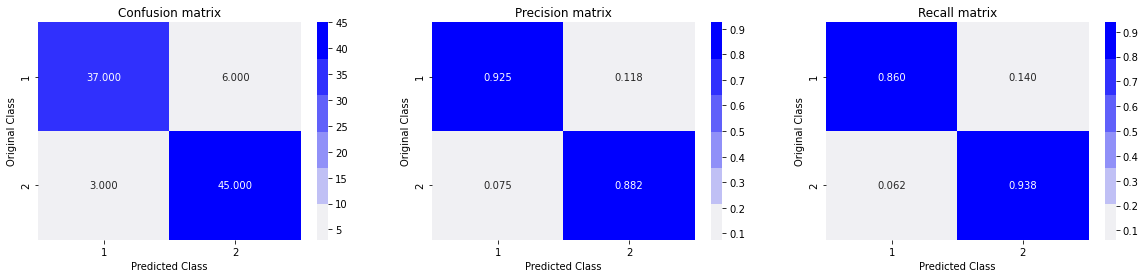

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

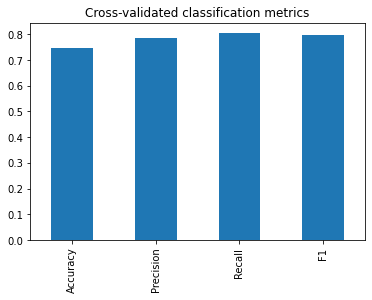

In [246]:
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
start = datetime.now()
classifier = ensemble.RandomForestClassifier(n_jobs=-1)
param_grid = {
    "n_estimators":np.arange(100,1000,100),
    "max_depth":np.arange(1,20,1),
    "criterion":['gini', 'entropy'],
}

model = model_selection.GridSearchCV(estimator=classifier, param_grid = param_grid,scoring='accuracy',verbose=10,cv=10,n_jobs=1)
model.fit(x_train,y_train)
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))
print('Accuarcy in train :' ,metrics.accuracy_score(y_train,model.predict(x_train)))

print('Precision in test :', precision_score(y_test, prediction))
print('Precision in train :', precision_score(y_train, model.predict(x_train)))

print('Recall  in test:', recall_score(y_test,prediction))
print('Recall  in train:', recall_score(y_train, model.predict(x_train)))

print('log loss' , metrics.log_loss(y_test, prediction))
print('Time taken to run this cell:' , datetime.now() - start)

plot_confusion_matrix(y_test,prediction)

from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_precision = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_recall = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_f1 = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,'Precision': cv_precision,'Recall': cv_recall,'F1': cv_f1},index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)


In [146]:
classifier.coef_

AttributeError: 'ExtraTreesClassifier' object has no attribute 'coef_'

In [147]:
features = dict(zip(df.columns.values, list(classifier.coef_[0])))

feature = pd.DataFrame(features, index=[0])
feature.T.plot.bar(title="Feature Importance", legend=False);

AttributeError: 'ExtraTreesClassifier' object has no attribute 'coef_'

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 126 out of 135 | elapsed:    9.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   10.7s finished
C:\Users\Mostafa Themar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and w

[07:23:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuarcy in test : 0.8571428571428571
Accuarcy in train : 0.910377358490566
Precision in test : 0.8723404255319149
Precision in train : 0.9083333333333333
Recall  in test: 0.8541666666666666
Recall  in train: 0.9316239316239316
log loss 4.934163634268352
Time taken to run this cell: 0:24:33.932922


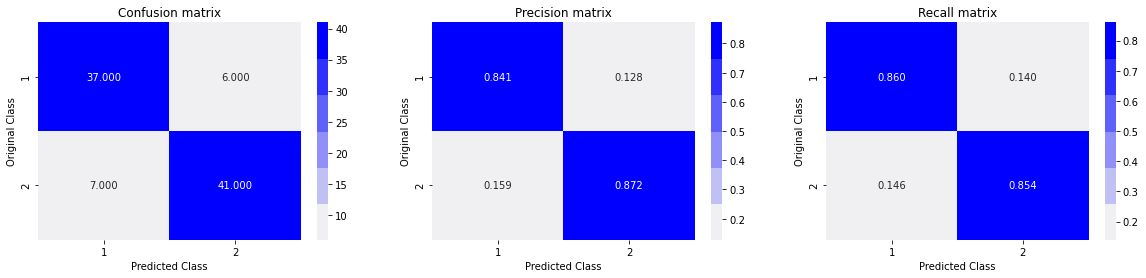

C:\Users\Mostafa Themar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:23:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Mostafa Themar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[07:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Mostafa Themar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Mostafa Themar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[07:23:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:23:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

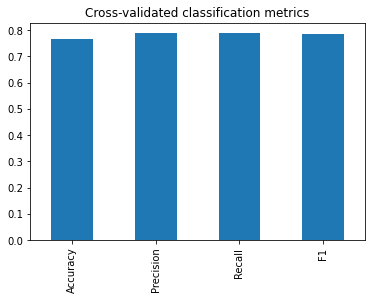

In [249]:
import xgboost as xgb

classifier =  xgb.XGBClassifier(learning_rate=0.5)
params = {"n_estimators":np.arange(100,1000,100),"max_depth":[1,15,1]}
model = model_selection.GridSearchCV(estimator=classifier,param_grid = params,cv=5,scoring="accuracy",verbose=10,n_jobs=-1)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))
print('Accuarcy in train :' ,metrics.accuracy_score(y_train,model.predict(x_train)))

print('Precision in test :', precision_score(y_test, prediction))
print('Precision in train :', precision_score(y_train, model.predict(x_train)))

print('Recall  in test:', recall_score(y_test,prediction))
print('Recall  in train:', recall_score(y_train, model.predict(x_train)))

print('log loss' , metrics.log_loss(y_test, prediction))
print('Time taken to run this cell:' , datetime.now() - start)

plot_confusion_matrix(y_test,prediction)

from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_precision = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_recall = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_f1 = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,'Precision': cv_precision,'Recall': cv_recall,'F1': cv_f1},index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)

Fitting 10 folds for each of 456 candidates, totalling 4560 fits
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100, score=0.636, total=   2.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100, score=0.773, total=   0.1s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100, score=0.762, total=   0.1s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100, score=0.762, total=   0.1s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s


[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100, score=0.714, total=   0.1s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.9s remaining:    0.0s


[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100, score=0.952, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100, score=0.857, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.2s remaining:    0.0s


[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100, score=0.810, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.4s remaining:    0.0s


[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200, score=0.636, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200, score=0.773, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200, score=0.714, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200, score=0.810, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 
[CV]  pca_

[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200, score=0.857, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200, score=0.952, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200 
[CV]  pca_

[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200, score=0.714, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200, score=0.905, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200 
[CV]  pca_

[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=200, score=0.905, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=200, score=0.857, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=200, score=0.810, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=200, score=0.714, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300, score=0.682, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300 
[CV]  pca_

[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=200, score=0.857, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=200, score=0.714, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300, score=0.636, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300, score=0.727, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300, score=0.810, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300 
[CV]  pca_

[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300, score=0.727, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300, score=0.727, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300, score=0.810, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300, score=0.857, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300 
[CV]  pca_

[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300, score=0.810, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300, score=0.857, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300, score=0.714, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300, score=0.667, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300, score=0.857, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300 
[CV]  pca_

[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300, score=0.762, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300, score=0.714, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300, score=0.905, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300, score=0.905, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300, score=0.857, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300 
[CV]  pca_

[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=300, score=0.905, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=300, score=0.857, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=300, score=0.857, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=300, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400, score=0.727, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400 
[CV]  pca_

[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=300, score=0.810, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=300 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=300, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400, score=0.682, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400, score=0.727, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400 


[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=300, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400, score=0.727, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400, score=0.727, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400 


[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400, score=0.727, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400, score=0.727, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400 


[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400, score=0.727, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400, score=0.762, total=   0.5s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400, score=0.667, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400 


[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400, score=0.714, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400, score=0.952, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400 


[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400, score=0.619, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400 


[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400, score=0.619, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400 


[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400, score=0.905, total=   0.5s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=100 


[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100, score=0.727, total=   0.2s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100 


[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=5, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100, score=0.636, total=   0.1s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100, score=0.727, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=1, rf__n_estima

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=400 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=400, score=0.714, total=   0.4s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100, score=0.591, total=   0.1s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100, score=0.773, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=2, rf

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100, score=0.636, total=   0.1s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100, score=0.682, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100, score=0.857, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=3, rf

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100, score=0.727, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100, score=0.810, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=4, rf

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100, score=0.810, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100, score=0.667, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100, score=0.952, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100, score=0.857, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=5, rf

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100, score=0.952, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100, score=0.857, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100, score=0.857, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=6, rf

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=100, score=0.810, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=100, score=0.857, total=   0.1s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=100 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=200, score=0.636, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=200, score=0.727, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=7, rf

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200, score=0.727, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200, score=0.682, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200, score=0.714, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=8, rf

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200, score=0.682, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200, score=0.727, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200, score=0.714, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200, score=0.857, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=9, rf

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200, score=0.682, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200, score=0.714, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200, score=0.714, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200, score=0.667, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200, score=0.682, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200, score=0.714, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200, score=0.810, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200, score=0.727, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200, score=0.714, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200, score=0.619, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200, score=0.682, total=   0.5s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200, score=0.714, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200, score=0.714, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200, score=0.619, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200, score=0.682, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200, score=0.667, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200, score=0.714, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200, score=0.727, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200, score=0.619, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200, score=0.682, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200, score=0.667, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200, score=0.727, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200, score=0.667, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200, score=0.727, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200, score=0.714, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200, score=0.714, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200, score=0.727, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200, score=0.714, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200 
[CV]  pca__n_components=5, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200, score=0.667, total=   0.3s
[CV] pca__n_components=5, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200, score=0.667, total=   0.2s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200, score=0.905, total=   0.2s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 
[CV]  pca_

[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200, score=0.952, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200, score=0.857, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200, score=0.857, total=   0.2s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200 
[CV]  pca_

[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200, score=0.952, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200, score=0.857, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200, score=0.714, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=300, score=0.727, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=300 
[CV]  pca_

[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300, score=0.773, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300, score=0.727, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300, score=0.762, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300 
[CV]  pca_

[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300, score=0.682, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300, score=0.682, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300, score=0.762, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300, score=0.857, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300, score=0.810, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300 
[CV]  pca_

[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300, score=0.810, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300, score=0.857, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300, score=0.762, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300, score=0.714, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300, score=0.905, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300 
[CV]  pca_

[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300, score=0.810, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300, score=0.762, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300, score=0.905, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300, score=0.905, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300, score=0.857, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300 
[CV]  pca_

[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300, score=0.905, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300, score=0.857, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300, score=0.857, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300, score=0.714, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=400, score=0.636, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=400 
[CV]  pca_

[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=300, score=0.810, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=300 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=300, score=0.714, total=   0.3s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400, score=0.727, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400, score=0.727, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400 
[CV]  pca_

[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400, score=0.682, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400, score=0.773, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400 


[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400, score=0.682, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400, score=0.667, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400 


[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400, score=0.714, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400 


[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400, score=0.667, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400 


[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400, score=0.667, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400 


[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400, score=0.667, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400, score=0.619, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=100 


[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400, score=0.714, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=100, score=0.727, total=   0.1s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=100 


[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400, score=0.714, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=100, score=0.727, total=   0.2s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=100, score=0.773, total=   0.2s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=100 


[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=400 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=400, score=0.714, total=   0.4s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100, score=0.636, total=   0.2s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100, score=0.727, total=   0.2s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100 


[CV]  pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=400, score=0.667, total=   0.4s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100, score=0.682, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100, score=0.727, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=1, rf__

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100, score=0.773, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100, score=0.857, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=2, rf

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100, score=0.905, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100, score=0.905, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=3, rf

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100, score=0.905, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100, score=0.905, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=5, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=5, rf

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100, score=0.905, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100, score=0.667, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=200, score=0.727, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=200, score=0.727, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=6, rf

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=100, score=0.857, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=100 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=200, score=0.727, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=200, score=0.773, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=7, rf

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=100, score=0.667, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200, score=0.682, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200, score=0.727, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200, score=0.857, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=8, rf

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200, score=0.682, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200, score=0.682, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200, score=0.810, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=9, rf

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200, score=0.727, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200, score=0.857, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200, score=0.714, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200, score=0.773, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200, score=0.857, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200, score=0.682, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200, score=0.714, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200, score=0.727, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200, score=0.857, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200, score=0.857, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200, score=0.667, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200, score=0.773, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200, score=0.810, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200, score=0.667, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200, score=0.773, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200, score=0.810, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200, score=0.810, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200, score=0.714, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200, score=0.727, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200, score=0.667, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200, score=0.727, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200, score=0.857, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200, score=0.667, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200, score=0.682, total=   0.3s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200, score=0.857, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200, score=0.667, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200, score=0.727, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200, score=0.857, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200 
[CV]  pca__n_components=7, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200, score=0.714, total=   0.2s
[CV] pca__n_components=7, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200, score=0.714, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200, score=0.857, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200, score=0.714, total=   0.2s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200, score=0.952, total=   0.2s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=1, rf__n_estimators=200 
[CV]  pca_

[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200, score=0.952, total=   0.2s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200, score=0.857, total=   0.2s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200, score=0.857, total=   0.2s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=2, rf__n_estimators=200 
[CV]  pca_

[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200, score=0.905, total=   0.2s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200, score=0.905, total=   0.2s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=300, score=0.682, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=300 
[CV]  pca_

[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=200, score=0.905, total=   0.2s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300, score=0.727, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300, score=0.773, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300, score=0.762, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=4, rf__n_estimators=300 
[CV]  pca_

[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300, score=0.727, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300, score=0.773, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300, score=0.762, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300, score=0.810, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300, score=0.810, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=5, rf__n_estimators=300 
[CV]  pca_

[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300, score=0.810, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300, score=0.857, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300, score=0.810, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300, score=0.714, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300, score=0.905, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=6, rf__n_estimators=300 
[CV]  pca_

[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300, score=0.810, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300, score=0.714, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300, score=0.857, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300, score=0.905, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300, score=0.810, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=7, rf__n_estimators=300 
[CV]  pca_

[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300, score=0.905, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300, score=0.857, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300, score=0.762, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=300, score=0.714, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=400, score=0.727, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=8, rf__n_estimators=400 
[CV]  pca_

[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=300, score=0.810, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=300 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=300, score=0.667, total=   0.3s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400, score=0.727, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400, score=0.727, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=9, rf__n_estimators=400 
[CV]  pca_

[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400, score=0.727, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400, score=0.727, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=10, rf__n_estimators=400 


[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400, score=0.773, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400, score=0.667, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=11, rf__n_estimators=400 


[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400, score=0.667, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=12, rf__n_estimators=400 


[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400, score=0.667, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=400 


[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400, score=0.667, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=14, rf__n_estimators=400 


[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400, score=0.619, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=15, rf__n_estimators=400, score=0.667, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=100 


[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400, score=0.905, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400, score=0.810, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=400, score=0.667, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=100, score=0.773, total=   0.2s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=100 


[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400, score=0.857, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=17, rf__n_estimators=400, score=0.714, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=100, score=0.727, total=   0.1s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=100, score=0.773, total=   0.2s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=100 


[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=400, score=0.762, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=400 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=18, rf__n_estimators=400, score=0.667, total=   0.4s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100, score=0.727, total=   0.1s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100, score=0.727, total=   0.2s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=9, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=100 


[CV]  pca__n_components=9, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=400, score=0.714, total=   0.4s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100, score=0.636, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100, score=0.727, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=1, rf__

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100, score=0.773, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=2, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=2, rf

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100, score=0.857, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100, score=0.714, total=   0.5s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100, score=0.952, total=   0.1s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=3, rf__n_estimators=100, score=0.905, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=3, rf

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100, score=0.905, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100, score=0.905, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=4, rf__n_estimators=100, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=4, rf

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100, score=0.762, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100, score=0.905, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100, score=0.905, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100, score=0.857, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=6, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=6, rf

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=100, score=0.905, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=100, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=100 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=200, score=0.727, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=200, score=0.773, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=7, rf

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=100, score=0.714, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200, score=0.727, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200, score=0.636, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=8, rf__n_estimators=200, score=0.857, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=8, rf

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200, score=0.727, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200, score=0.636, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200, score=0.810, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=9, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=9, rf

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200, score=0.773, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200, score=0.857, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=10, rf__n_estimators=200, score=0.667, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200, score=0.682, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200, score=0.857, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=11, rf__n_estimators=200, score=0.667, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200, score=0.682, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200, score=0.857, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=12, rf__n_estimators=200, score=0.667, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200, score=0.727, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200, score=0.857, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=13, rf__n_estimators=200, score=0.667, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200, score=0.636, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200, score=0.810, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200, score=0.857, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200, score=0.810, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=14, rf__n_estimators=200, score=0.667, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200, score=0.682, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200, score=0.714, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200, score=0.857, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200, score=0.810, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=15, rf__n_estimators=200, score=0.619, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200, score=0.682, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200, score=0.857, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=16, rf__n_estimators=200, score=0.667, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200, score=0.682, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200, score=0.762, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200, score=0.810, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=17, rf__n_estimators=200, score=0.667, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200, score=0.682, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200, score=0.857, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200, score=0.810, total=   0.2s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=200, score=0.762, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_de

[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200, score=0.727, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200, score=0.714, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200, score=0.857, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200, score=0.810, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200 
[CV]  pca__n_components=9, rf__criterion=entropy, rf__max_depth=19, rf__n_estimators=200, score=0.714, total=   0.3s
[CV] pca__n_components=9, rf__criterion=entropy, rf__max_de

[Parallel(n_jobs=1)]: Done 4560 out of 4560 | elapsed: 21.8min finished


Accuarcy in test : 0.8571428571428571
Accuarcy in train : 1.0
Precision in test : 0.8723404255319149
Precision in train : 1.0
Recall  in test: 0.8541666666666666
Recall  in train: 1.0
log loss 4.934163634268352
Time taken to run this cell: 0:21:45.721688


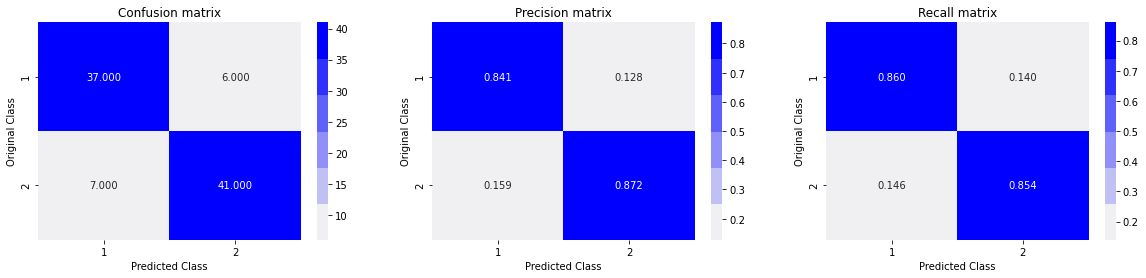

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

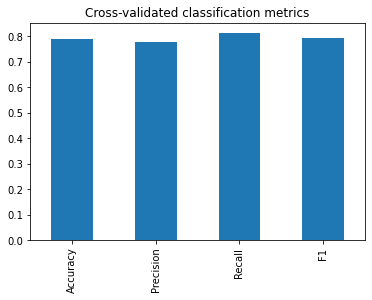

In [270]:
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
start = datetime.now()
scl = preprocessing.StandardScaler()
pca = decomposition.PCA()
rf = RandomForestClassifier(n_jobs = -1)

classifier = pipeline.Pipeline([("scaling", scl),("pca", pca),("rf",rf)])
param_grid = {
    "pca__n_components":np.arange(5,10,2),
    "rf__n_estimators":np.arange(100,500,100),
    "rf__max_depth":np.arange(1,20,),
    "rf__criterion":['gini', 'entropy'],
}

model = model_selection.GridSearchCV(estimator=classifier, param_grid = param_grid,scoring='accuracy',verbose=10,cv=10,n_jobs=1)
model.fit(x_train,y_train)
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))
print('Accuarcy in train :' ,metrics.accuracy_score(y_train,model.predict(x_train)))

print('Precision in test :', precision_score(y_test, prediction))
print('Precision in train :', precision_score(y_train, model.predict(x_train)))

print('Recall  in test:', recall_score(y_test,prediction))
print('Recall  in train:', recall_score(y_train,model.predict(x_train)))

print('log loss' , metrics.log_loss(y_test, prediction))
print('Time taken to run this cell:' , datetime.now() - start)

plot_confusion_matrix(y_test,prediction)

from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_precision = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_recall = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_f1 = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,'Precision': cv_precision,'Recall': cv_recall,'F1': cv_f1},index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)


In [306]:
import optuna
from functools import partial

In [307]:
def optimize(trial, x,y):
    
    criterion      = trial.suggest_categorical("criterion", ["gini","entropy"])
    n_estimators   = trial.suggest_int("n_estimators", 100,1000)
    max_depth      = trial.suggest_int("max_depth", 1,15)
    max_featuers   = trial.suggest_uniform("max_featuers", 0.01 , 1.0)
    
    classifier = ensemble.RandomForestClassifier(
        n_estimators    = n_estimators,
        max_depth       = max_depth,
        max_features    = max_featuers,
        criterion       = criterion,
    )
    kf = model_selection.StratifiedKFold(n_splits=5)
    accuracies = []
    for idx in kf.split(X=x , y=y):
        train_idx , test_idx = idx[0] , idx[1]
        x_train = x.iloc[train_idx]
        y_train = y.iloc[train_idx]
        
        x_test = x.iloc[test_idx]
        y_test = y.iloc[test_idx]
        
        classifier.fit(x_train,y_train)
        prediction = classifier.predict(x_test)
        acc = metrics.accuracy_score(y_test, prediction)
        accuracies.append(acc)
    
    return -1.0*np.mean(accuracies)

In [308]:
optimization_function = partial(optimize, x=x , y=y)
study = optuna.create_study(direction="minimize")
study.optimize(optimization_function,n_trials = 15)

[I 2021-11-18 08:17:42,635] A new study created in memory with name: no-name-6609db43-d720-470a-b8b1-a8f6795ec040
[I 2021-11-18 08:17:45,577] Trial 0 finished with value: -0.8051366120218578 and parameters: {'criterion': 'gini', 'n_estimators': 467, 'max_depth': 12, 'max_featuers': 0.6336662394952695}. Best is trial 0 with value: -0.8051366120218578.
[I 2021-11-18 08:17:49,335] Trial 1 finished with value: -0.8083606557377049 and parameters: {'criterion': 'entropy', 'n_estimators': 671, 'max_depth': 8, 'max_featuers': 0.3984962032320147}. Best is trial 1 with value: -0.8083606557377049.
[I 2021-11-18 08:17:53,181] Trial 2 finished with value: -0.8216393442622951 and parameters: {'criterion': 'gini', 'n_estimators': 773, 'max_depth': 3, 'max_featuers': 0.4893312842771231}. Best is trial 2 with value: -0.8216393442622951.
[I 2021-11-18 08:17:55,234] Trial 3 finished with value: -0.8116939890710382 and parameters: {'criterion': 'entropy', 'n_estimators': 350, 'max_depth': 13, 'max_featuer

In [313]:
from skopt import gp_minimize
from functools import partial
from skopt  import space
from hyperopt.pyll.base import scope

In [322]:
def optimize(params, x ,y):
    classifier = ensemble.RandomForestClassifier(**params)
    kf = model_selection.StratifiedKFold(n_splits=5)
    accuracies = []
    for idx in kf.split(X = x, y=y):
        train_idx , test_idx = idx[0] , idx[1]
        x_train = x.iloc[train_idx]
        y_train = y.iloc[train_idx]
        
        x_test = x.iloc[test_idx]
        y_test = y.iloc[test_idx]
        
        classifier.fit(x_train, y_train)
        prediction = classifier.predict(x_test)
        acc = metrics.accuracy_score(y_test,prediction)
        accuracies.append(acc)
        
    return -1.0 * np.mean(accuracies)

In [323]:
from hyperopt import hp , fmin, tpe , Trials
from hyperopt.pyll.base import scope
param_space = {
    "max_depth"    : hp.quniform("max_depth", 3, 15 ,1),
    "n_estimators" :scope.int(hp.quniform("n_estimators", 100, 600,1)),
    "criterion"    : hp.choice( "criterion",["gini", "entropy"]),
    "max_features" : hp.uniform("max_featuers",0.01,1)
}
trials = Trials()
optimization_function = partial(optimize, x=x, y=y)
result = fmin(
    fn=optimization_function,
    space=param_space,
    trials=trials,
    algo=tpe.suggest,
    max_evals = 15
)
print(result)

100%|███████████████████████████████████████████████| 15/15 [00:28<00:00,  1.91s/trial, best loss: -0.8381420765027323]
{'criterion': 1, 'max_depth': 3.0, 'max_featuers': 0.7633535483043024, 'n_estimators': 421.0}
